Initial libraries

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading the dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/anjaliasha123/Data_Visualization_projects/master/Streamlit_python/Tweets.csv', usecols=['text','airline_sentiment','airline'])
data.head(3)

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...


Total number of tweets in the dataset - we have total 14,640 tweets in total

In [6]:
data.airline.count()

14640

Count of tweets per sentiment :

This dataset is highly imbalanced with more number of negative tweets than positive and neutral tweets. This may have an effect on the model that it will be trained. Hence, the dataset need to be made into a balanced dataset before usage

In [4]:
data.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Viewing the counts of the tweet sentiments for each airline

In [12]:
in1 = data.groupby(by=['airline','airline_sentiment']).count()
in1

text
airline        airline_sentiment      
American       negative           1960
               neutral             463
               positive            336
Delta          negative            955
               neutral             723
               positive            544
Southwest      negative           1186
               neutral             664
               positive            570
US Airways     negative           2263
               neutral             381
               positive            269
United         negative           2633
               neutral             697
               positive            492
Virgin America negative            181
               neutral             171
               positive            152

['Southwest', 'US Airways', 'Delta', 'American', 'Virgin America', 'United']
                Positive  Negative  Neutral
Southwest            570      1186      664
US Airways           269      2263      381
Delta                544       955      723
American             336      1960      463
Virgin America       152       181      171
United               492      2633      697


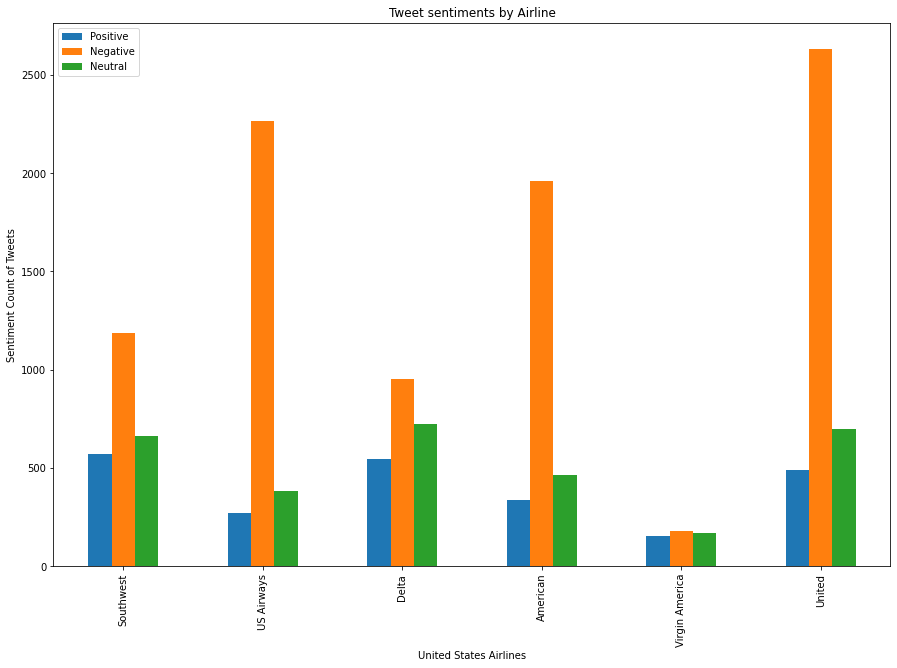

In [20]:
#fetching list of airlines in the data
airlines = list(set(data['airline']))
print(airlines)
neutral = []
positive = []
negative = []
total = []
for air in airlines:
  nu = data.query("airline == @air and airline_sentiment == 'neutral'").text.count()
  po = data.query("airline == @air and airline_sentiment == 'positive'").text.count()
  ng = data.query("airline == @air and airline_sentiment == 'negative'").text.count()
  neutral.append(nu)
  positive.append(po)
  negative.append(ng)
  total.append(nu+po+ng)

in1 = pd.DataFrame(index = airlines)
in1['Positive'] = positive
in1['Negative'] = negative
in1['Neutral'] = neutral
print(in1)
pl = in1.plot.bar(figsize=(15,10))
plt.xlabel('United States Airlines')
plt.ylabel('Sentiment Count of Tweets')
plt.title('Tweet sentiments by Airline')
plt.show()

*Observations*
* There are less number of customers using Virgin America for travelling
* United airlines and US Airways have a good number of customers and also had bad experience with the airlines
* Even though Southwest and Delta airlines had not many customers using their service, they had pretty good experince
* Virgin America was not a choice for many of the customers for flying

*Assumptions made for above insights:*
* All customers who flew had given a review
* No bias for a customer for a particular airline
* All the airlines had services running on the tweeted dates

In [22]:
percentNeg = []
percentPos = []
percentNeu = []
for neg,po,nu,tot in zip(negative,positive, neutral,total):
    percng = (neg/tot)*100
    percpo = (po/tot)*100
    percnu = (nu/tot)*100
    percentNeg.append(percng)
    percentPos.append(percpo)
    percentNeu.append(percnu)
    
in2 = pd.DataFrame(index=airlines)
in2['Negative Feedback %'] = percentNeg 
in2['Positive Feedback %'] = percentPos
in2['Neutral Feedback %'] = percentNeu
print(in2[['Negative Feedback %','Positive Feedback %','Neutral Feedback %']])

                Negative Feedback %  Positive Feedback %  Neutral Feedback %
Southwest                 49.008264            23.553719           27.438017
US Airways                77.686234             9.234466           13.079300
Delta                     42.979298            24.482448           32.538254
American                  71.040232            12.178325           16.781443
Virgin America            35.912698            30.158730           33.928571
United                    68.890633            12.872841           18.236525


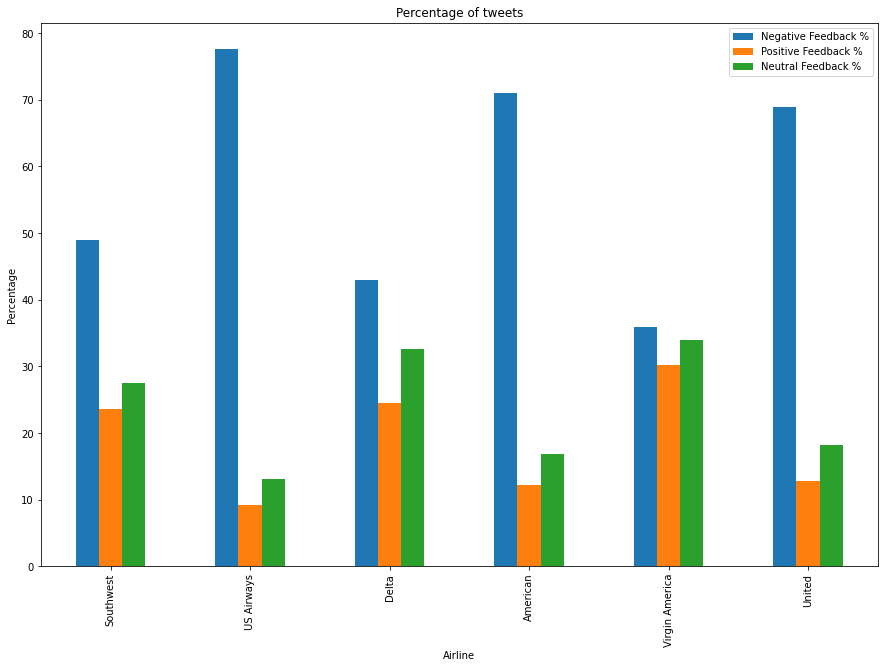

In [25]:
pl = in2.plot.bar(figsize=(15,10))
plt.title('Percentage of tweets')
plt.xlabel('Airline')
plt.ylabel('Percentage')
plt.show()

*Observations:*
* US Airways has the highest % of negative reviews
* Virgin America has the highest % of positive feedback